# Fashion MNIST

In [4]:
import torch
from torchvision import datasets, transforms
import helper

# Normalization
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)


# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


26427392it [00:09, 2865147.62it/s]                                                                                     


Extracting C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw


32768it [00:00, 59257.76it/s]                                                                                          


Extracting C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw


4423680it [00:02, 1981698.30it/s]                                                                                      


Extracting C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw


8192it [00:00, 26078.79it/s]                                                                                           


Extracting C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Emrah Sariboz/.pytorch/F_MNIST_data/FashionMNIST\raw
Processing...


..\torch\csrc\utils\tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


Done!


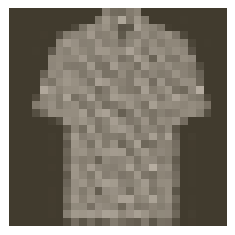

In [8]:
image, label = next(iter(trainloader))
helper.imshow(image[0, :])

# Building the network

In [18]:
from torch import nn
from torch import optim

model = nn.Sequential(nn.Linear(784, 128),
                      nn.ReLU(),
                      nn.Linear(128, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10),
                      nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)


In [19]:
epochs = 10

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], - 1)
        
        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    else:
        print("Training loss: ", running_loss / len(trainloader))
        

Training loss:  1.0011495830280694
Training loss:  0.5538848550843277
Training loss:  0.489661414549549
Training loss:  0.45720641367407494
Training loss:  0.4346425104528856
Training loss:  0.41706645042339624
Training loss:  0.40239927561870265
Training loss:  0.39014848559967746
Training loss:  0.37993821929067945
Training loss:  0.369938418205613


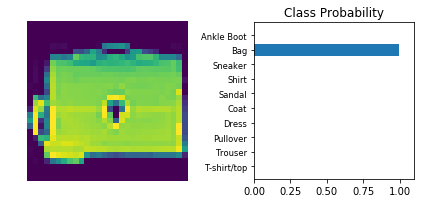

In [28]:
%matplotlib inline
import helper

images, label = next(iter(testloader))

img = images[2].view(1, 784)

with torch.no_grad():
    logs= model(img)


ps = torch.exp(logs)
helper.view_classify(img.view(1, 28, 28), ps, version='Fashion')